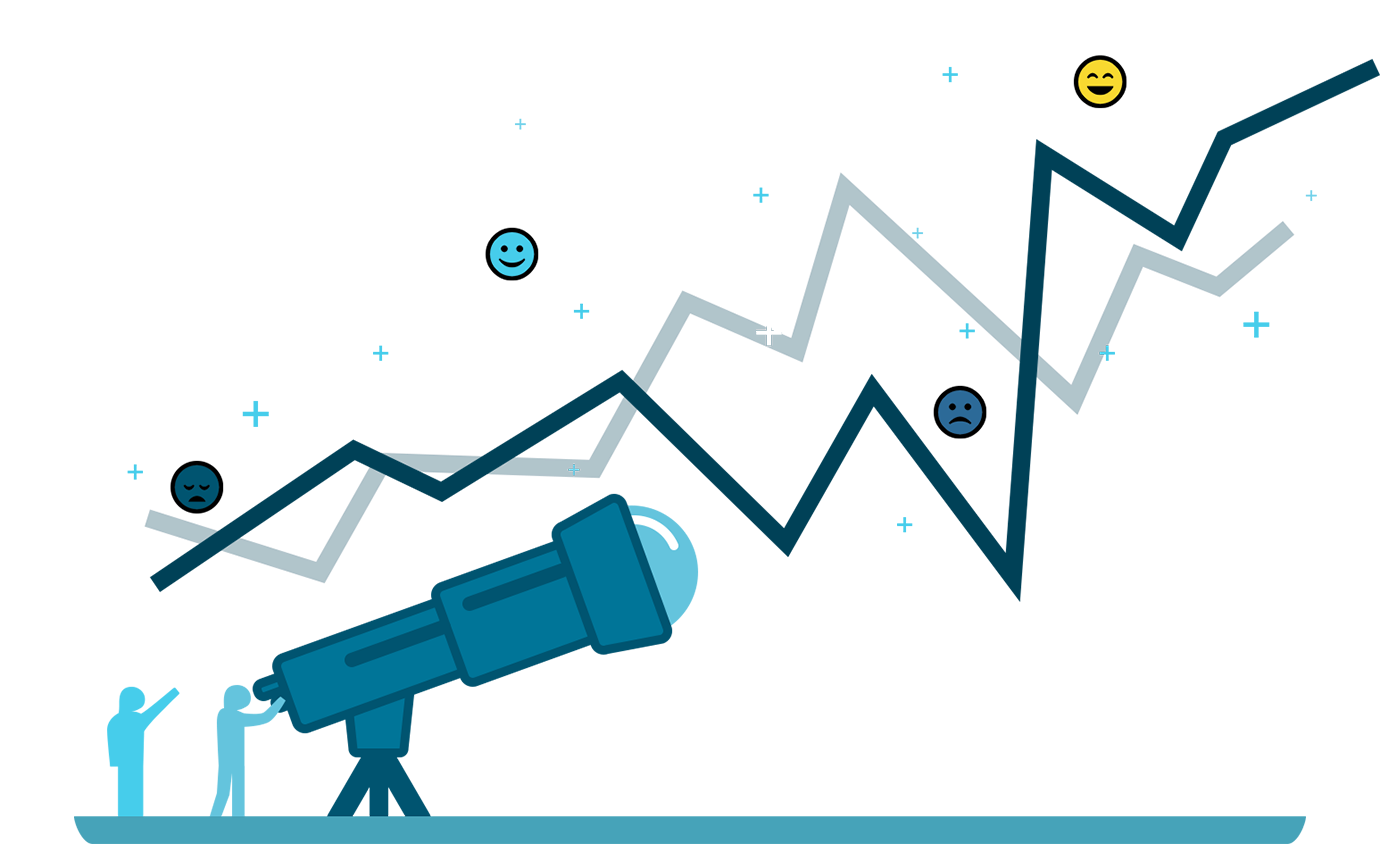
BigMart Sales Verisetini Kullanarak XGBoost, Regresyon, Light Gradient Boosting Machine ve Random Forest ile Satış Tahmini yapıldı. Elde edilen sonuçlar karşılaştırıldı.



KÜTÜPHANELER


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter('ignore')

VERİNİN YÜKLENMESİ

In [32]:
data = pd.read_csv('Train.csv')

VERİYE GENEL BİR BAKIŞ


In [33]:
data.head().append(data.tail())


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [34]:
data.shape


(8523, 12)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


EKSİK VERİLERİN TESPİTİ VE DOLDURULMASI

Burada eksik veriler ortalama ve mod bilgilerine göre dolduruldu.

In [36]:
data.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [37]:
data['Item_Weight'].mean()


12.857645184136183

In [38]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)


In [39]:
data['Outlet_Size'].mode().values

array(['Medium'], dtype=object)

In [40]:
mode_of_Outlet_size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))


In [41]:
mode_of_Outlet_size


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [42]:
miss_values = data['Outlet_Size'].isnull()


In [43]:
miss_values


0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [44]:
data.loc[miss_values,'Outlet_Size'] = data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])


In [45]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

VERİNİN ANALİZİ VE GÖRSELLEŞTİRİLMESİ

In [46]:
print(data.describe())

       Item_Weight  ...  Item_Outlet_Sales
count  8523.000000  ...        8523.000000
mean     12.857645  ...        2181.288914
std       4.226124  ...        1706.499616
min       4.555000  ...          33.290000
25%       9.310000  ...         834.247400
50%      12.857645  ...        1794.331000
75%      16.000000  ...        3101.296400
max      21.350000  ...       13086.964800

[8 rows x 5 columns]



Sayısal Değişkenler



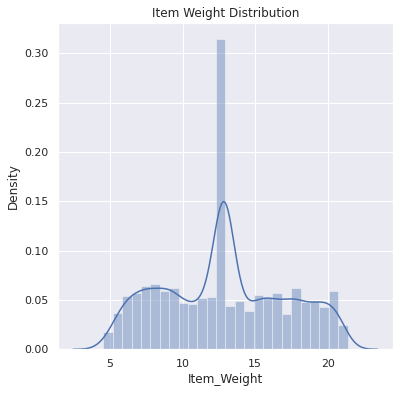

In [47]:
sns.set()
#Item Weight distribution
plt.figure(figsize=(6, 6))
plt.title('Item Weight Distribution')
sns.distplot(data['Item_Weight'])
plt.show()


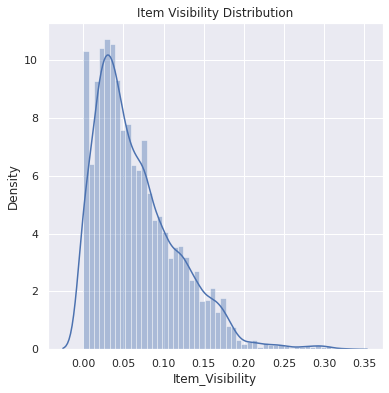

In [48]:
# Item Visibilty Distribution
plt.figure(figsize=(6,6))
plt.title('Item Visibility Distribution')
sns.distplot(data['Item_Visibility'])
plt.show()


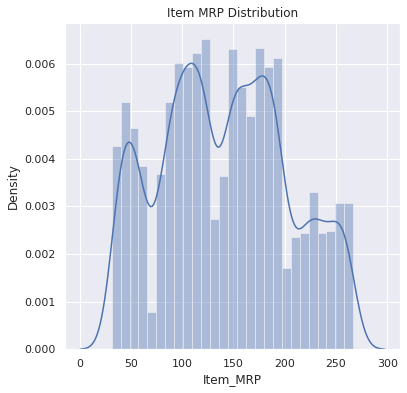

In [49]:
#Item MRP Distribution
plt.figure(figsize=(6, 6))
plt.title('Item MRP Distribution')
sns.distplot(data['Item_MRP'])
plt.show()


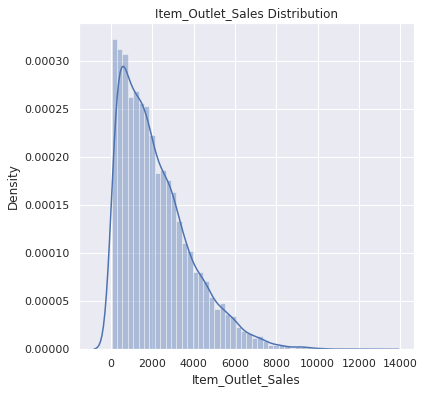

In [50]:
#Item_Outlet_Sales Distribution
plt.figure(figsize=(6, 6))
plt.title('Item_Outlet_Sales Distribution')
sns.distplot(data['Item_Outlet_Sales'])
plt.show()


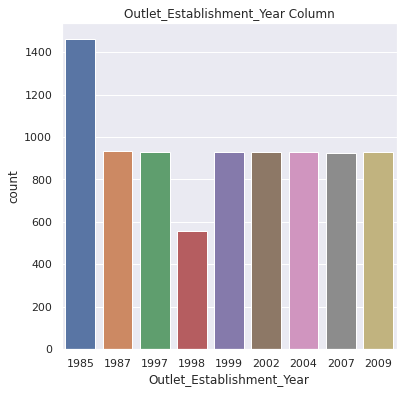

In [51]:
#Outlet_Establishment_Year Column
plt.figure(figsize=(6, 6))
plt.title('Outlet_Establishment_Year Column')
sns.countplot(x = 'Outlet_Establishment_Year', data = data)
plt.show()

KATEGORİK DEĞİŞKENLER


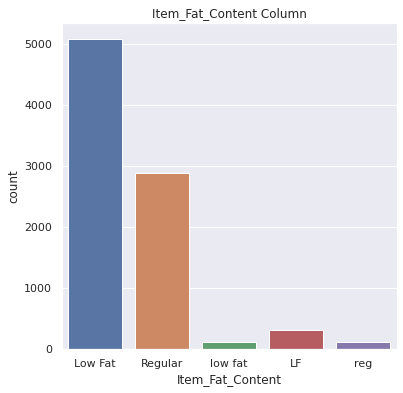

In [52]:
# Item_Fat_Content Column
plt.figure(figsize=(6, 6))
plt.title('Item_Fat_Content Column')
sns.countplot(x = 'Item_Fat_Content', data = data)
plt.show()

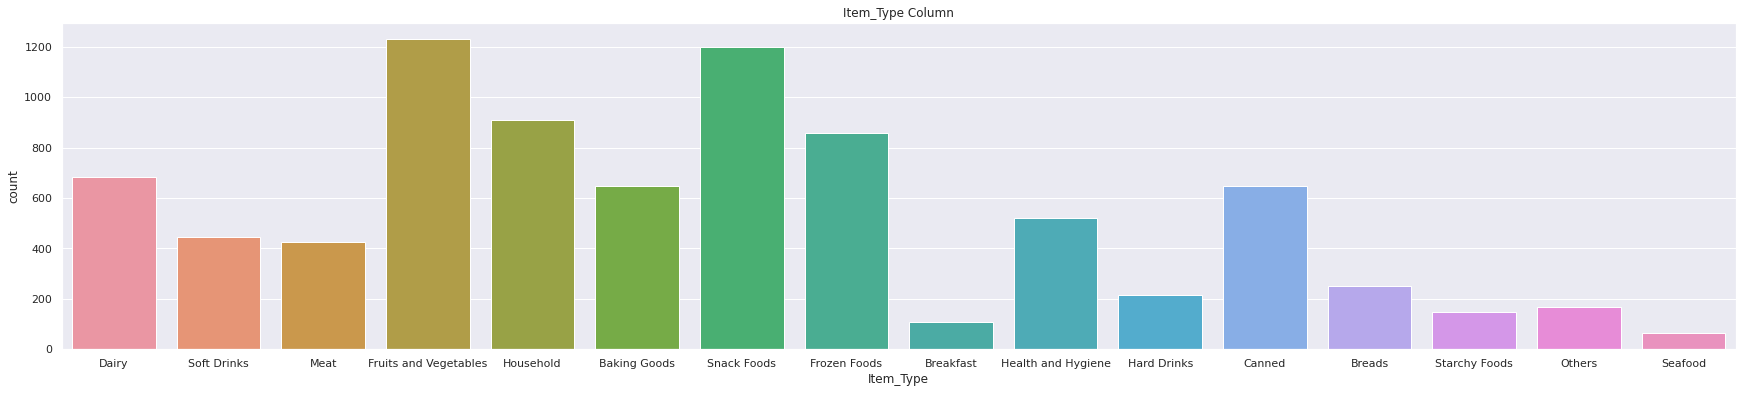

In [53]:
# Item_Type Column
plt.figure(figsize=(30, 6))
plt.title('Item_Type Column')
sns.countplot(x = 'Item_Type', data = data)
plt.show()


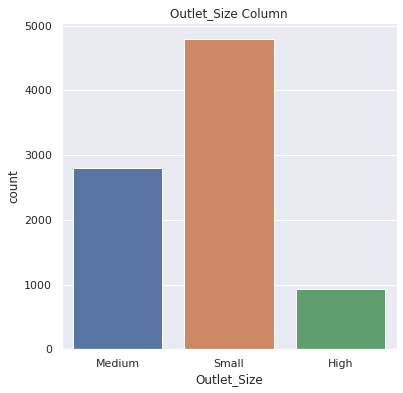

In [54]:
#Outlet_Size Column
plt.figure(figsize=(6, 6))
plt.title('Outlet_Size Column')
sns.countplot(x = 'Outlet_Size', data = data)
plt.show()

VERİ ÖN İŞLEME ADIMLARI


In [55]:
data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [56]:
data['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [57]:
data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low_Fat', 'reg': 'Regular'}}, inplace=True)


In [58]:
data['Item_Fat_Content'].value_counts()

Low Fat    5201
Regular    3006
Low_Fat     316
Name: Item_Fat_Content, dtype: int64

LABEL ENCODİNG

Burada kategorik değişkenlerin sayısal değişkenlere dönüştürlmesi işlemi yapıldı.

In [59]:
encoder = LabelEncoder()

data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

print(data.head())

   Item_Identifier  Item_Weight  ...  Outlet_Type  Item_Outlet_Sales
0              156         9.30  ...            1          3735.1380
1                8         5.92  ...            2           443.4228
2              662        17.50  ...            1          2097.2700
3             1121        19.20  ...            0           732.3800
4             1297         8.93  ...            1           994.7052

[5 rows x 12 columns]


BAĞIMLI VE BAĞIMSIZ DEĞİŞKENLERİNİ BELİRLENMESİ


In [60]:
X = data.drop(columns='Item_Outlet_Sales', axis=1)
Y = data['Item_Outlet_Sales']

In [61]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,2,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,2,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2


In [62]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

VERİNİN TEST VE TRAİN OLARAK BÖLÜNMESİ


In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
X.shape, X_train.shape, X_test.shape

((8523, 11), (6818, 11), (1705, 11))

MAKİNE ÖĞRENMESİ MODELLERİ


In [64]:
# XGBoost Regressor
regressor = XGBRegressor()
regressor.fit(X_train,Y_train)

training_data_prediction = regressor.predict(X_train)
# R Squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared Value = ', r2_train)
# Prediction on Test Data
test_data_prediction = regressor.predict(X_test)
# R Squared Data
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared Value = ', r2_test)


[10:43:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R Squared Value =  0.6364457030941357
R Squared Value =  0.5867640914432671


In [65]:
# Lİnear Regression
lr = LinearRegression()
lr.fit(X_train,Y_train)
# R Squared Value
training_data_prediction_reg = lr.predict(X_train)
r2_train_reg = metrics.r2_score(Y_train,training_data_prediction_reg)
print('R Squared Value Regression = ', r2_train_reg)
# Prediction on Test Data
test_data_prediction_reg = lr.predict(X_test)
r2_test_reg = metrics.r2_score(Y_test, test_data_prediction_reg)
print('R Squared Value Reg Test = ',r2_test_reg)


R Squared Value Regression =  0.5071727968959407
R Squared Value Reg Test =  0.48900695501640923


In [66]:
#LightGBM
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, Y_train)
# R Squared Value
gbm_trained_pred_train = lgb_model.predict(X_train)
r2_train_gbm = metrics.r2_score(Y_train,gbm_trained_pred_train)
print('R Squared Value Train GBM: ', r2_train_gbm)
# Prediction on Test Data
gbm_trained_pred_test = lgb_model.predict(X_test)
r2_test_gbm = metrics.r2_score(Y_test,gbm_trained_pred_test)
print('R Squared Value Test Gbm: ',r2_test_gbm)


R Squared Value Train GBM:  0.7381156472750419
R Squared Value Test Gbm:  0.5804751152803048


In [67]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300, random_state = 42)
rf.fit(X_train,Y_train)
# R Squared Value
rf_trained_pred_train = rf.predict(X_train)
r2_train_rf = metrics.r2_score(Y_train,rf_trained_pred_train)
print('R Squared Value Train RF: ',r2_train_rf)
# Prediction on Test Data
rf_trained_pred_test = rf.predict(X_test)
r2_test_rf = metrics.r2_score(Y_test,rf_trained_pred_test)
print('R Squared Value Test RF: ',r2_test_rf)

R Squared Value Train RF:  0.9395994226572719
R Squared Value Test RF:  0.5536266554914882


No handles with labels found to put in legend.


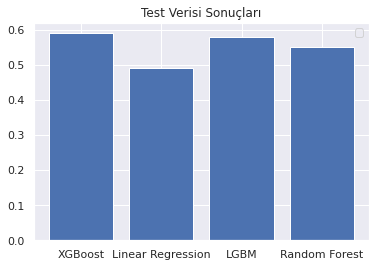

In [68]:
#4 farklı Modelin Test Verisi Üzerinden Elde Edilen Sonuçlara Göre Karşılaştırmaları
plt.bar(['XGBoost','Linear Regression','LGBM','Random Forest'],[round(r2_test,2),round(r2_test_reg,2),round(r2_test_gbm,2),round(r2_test_rf,2)])
plt.legend()
plt.title('Test Verisi Sonuçları')
plt.show()

No handles with labels found to put in legend.


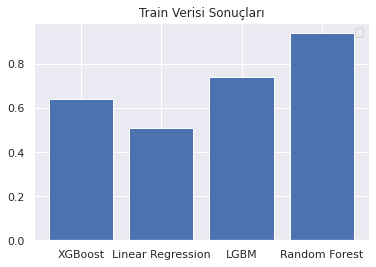

In [69]:
#4 farklı Modelin Train Verisi Üzerinden Elde Edilen Sonuçlara Göre Karşılaştırmaları
plt.bar(['XGBoost','Linear Regression','LGBM','Random Forest'],[round(r2_train,2),round(r2_train_reg,2),round(r2_train_gbm,2),round(r2_train_rf,2)])
plt.legend()
plt.title('Train Verisi Sonuçları')
plt.show()